In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("911.csv")
df=dataset.copy()

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# what are the top 5 zipcodes for 911 calls?
df["zip"].value_counts().head(5) # TOP MOST 5 CALLS

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [6]:
# What are the top 5 township (twp) for 911 calls?
df["twp"].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [7]:
# Take a look at the "title" column, how many unique title codes are there?
df["title"].nunique()   # nunuqiue is number of unique

110

In [8]:
# In the titles column there are "Reason/Department" specified before the titles code.
# These are EMS, Fire, and Traffic.
# Creating a new column called "Reason" that contains this string value.

df["Reason"]=df["title"].apply(lambda x: x.split(":")[0])

In [9]:
df["Reason"]

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [10]:
df["Reason"].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

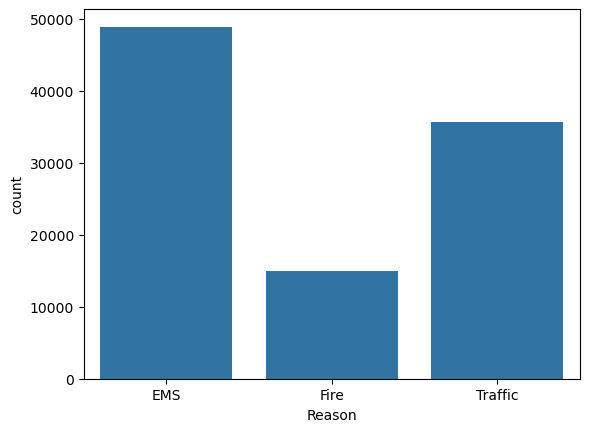

In [11]:
# Using seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x=df["Reason"])

In [12]:
# Based on time information ,I have performed a couple of time related analysis
# What is the data type of the objects in the timeStamp column?
type(df["timeStamp"].iloc[0])

str

In [13]:
# Converting timeStamp in "String" to "timeStamp" datatypes i.e a Datatime object,
df["timeStamp"]=pd.to_datetime(df["timeStamp"])

In [14]:
df["timeStamp"]

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [15]:
# Now that the timeStamp column are actually DateTime objects,we are creating 3 new column
# you will create these columns based off of the timeStamp column

df["Hour"]=df["timeStamp"].apply(lambda x: x.hour)
df["Month"]=df["timeStamp"].apply(lambda x: x.month)
df["Day of Week"]=df["timeStamp"].apply(lambda x: x.dayofweek)

In [16]:
# Changing Numbercial value Day of Week to Categorial values of Day names
dmap={0:"mom",1:"tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
df["Day of week"]=df["Day of Week"].map(dmap)

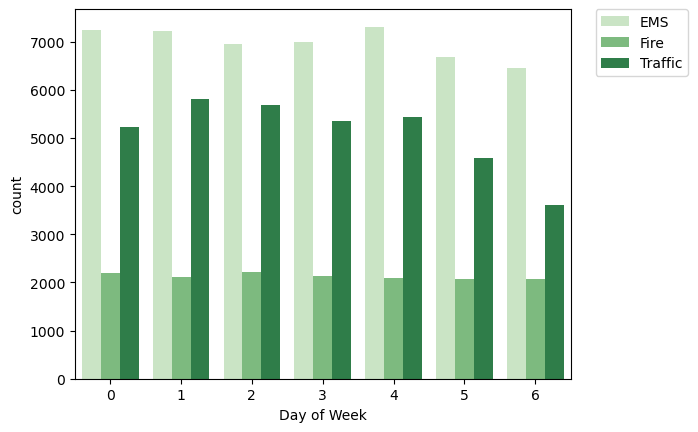

In [17]:
# Using seaborn to create a countplot of the day of Week column with the hue baesd off of the reason column

sns.countplot(x="Day of Week", data=df,hue="Reason",palette="Greens")

# TO relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
              

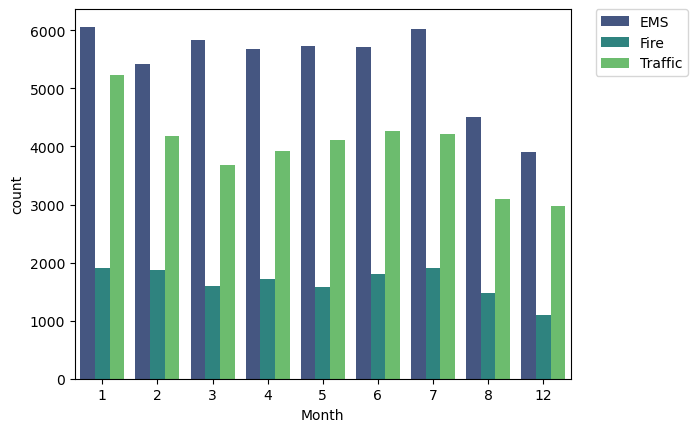

In [18]:
# Using seaborn to create a countplot of the day of Week column with the hue baesd off of the reason column

sns.countplot(x="Month", data=df,hue="Reason",palette="viridis")

# TO relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
              

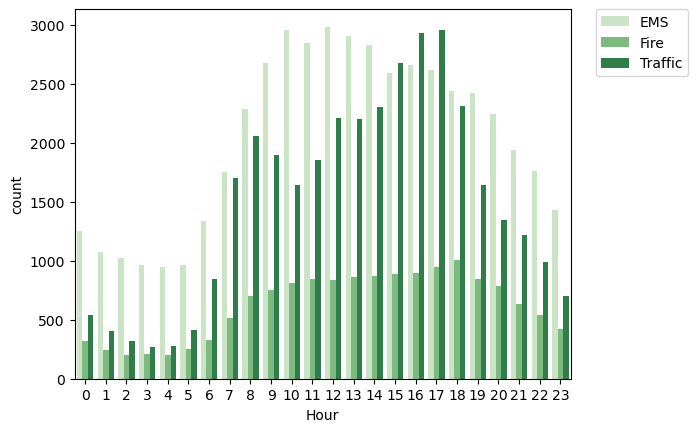

In [19]:
# Using seaborn to create a countplot of the day of Week column with the hue baesd off of the reason column

sns.countplot(x="Hour", data=df,hue="Reason",palette="Greens")

# TO relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
              

In [20]:
# Creating a grupby object called byMonth, where you group the DataFrame by the month column.
# Using the count() method for affregation.

byMonth=df.groupby("Month").count()
byMonth.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Day of week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<Axes: xlabel='Month'>

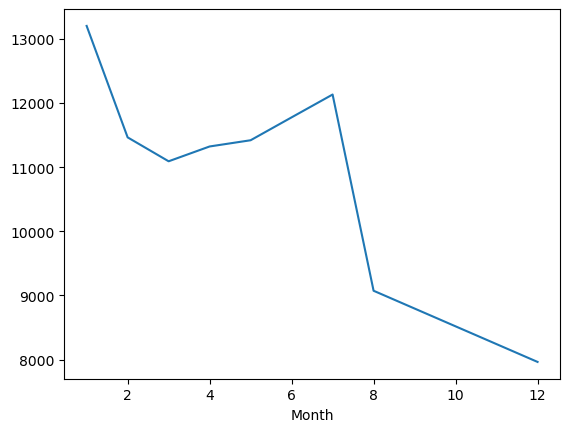

In [21]:
# Create a simple plot off of the dataframe indicating the count of calls per month.
byMonth["twp"].plot()

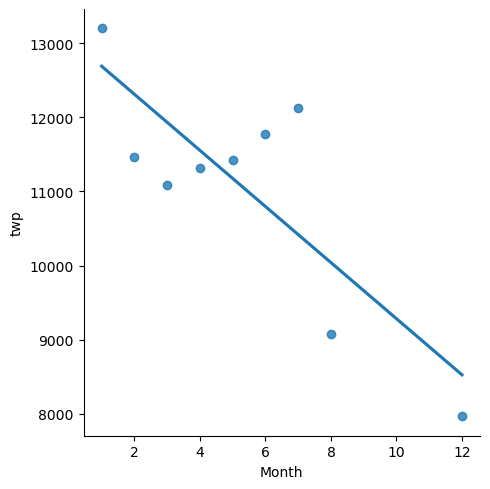

In [22]:
# Use seaborn 's lmplot () to create a linear fit on the number of calls per month.
# Need to reset the index to a cloumn while plotting  along the column used for groupby.

sns.lmplot(x="Month",y="twp",data=byMonth.reset_index(),ci=None)

In [23]:
# Crating a new colun called "Date" that contains the date from the timeStamp column.
df["Date"]=df["timeStamp"].apply(lambda t: t.date())

In [24]:
df["Date"]

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

<Axes: xlabel='Date'>

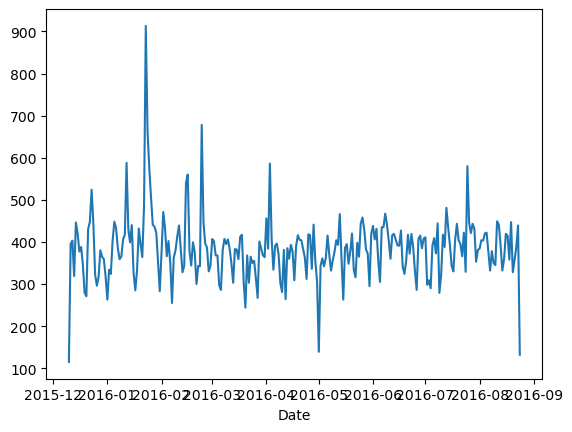

In [25]:
# Now group this date column with the count() aggregate and create a plot of counts of 911 calls.
df.groupby("Date").count()["twp"].plot()